In [113]:
# Import required libraries
import nltk
import numpy as np
import pandas
import matplotlib.pyplot as plt
from textblob import TextBlob

## Textblob Implementation

In [54]:
# read the data into a pandas dataframe
restaurant_reviews = pandas.read_csv('Restaurant_Reviews.tsv',sep='\t')
restaurant_reviews.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [55]:
# Check the accuracy between liked column and the textblob results
pos_acc = 0
neg_acc = 0

for ind, review in restaurant_reviews.iterrows():
    analysis = TextBlob(review["Review"])
    if analysis.sentiment.polarity > 0:
        pos_acc = pos_acc+1 if review["Liked"] == 1 else pos_acc
            
    if analysis.sentiment.polarity <= 0:
        neg_acc = neg_acc+1 if review["Liked"] == 0 else neg_acc

all_pos = restaurant_reviews[restaurant_reviews['Liked']== 0].shape[0]
all_neg = restaurant_reviews[restaurant_reviews['Liked']== 1].shape[0]
print("Positive Accuracy is {}%".format(pos_acc/all_pos*100))
print("Negative Accuracy is {}%".format(neg_acc/all_neg*100))

Positive Accuracy is 78.8%
Negative Accuracy is 76.0%


In [57]:
# Add the textblob sentiment as an extra column to the reviews dataframe
textblob_ratings = []
for ind, review in restaurant_reviews.iterrows():
    analysis = TextBlob(review["Review"])
    if analysis.sentiment.polarity > 0:
        textblob_ratings.append(1)
            
    if analysis.sentiment.polarity <= 0:
        textblob_ratings.append(0)

if 'Textblob_Rating' not in restaurant_reviews.columns:
    restaurant_reviews.insert(2, "Textblob_Rating", textblob_ratings, True)
restaurant_reviews

,Review,Liked,Textblob_Rating
0,Wow... Loved this place.,1,1
1,Crust is not good.,0,0
2,Not tasty and the texture was just nasty.,0,0
3,Stopped by during the late May bank holiday of...,1,1
4,The selection on the menu was great and so wer...,1,1
...,...,...,...
995,I think food should have flavor and texture an...,0,0
996,Appetite instantly gone.,0,0
997,Overall I was not impressed and would not go b...,0,0
998,"The whole experience was underwhelming, and I ...",0,1


In [69]:
# Calculate the pearson correlation between the Liked and Textblob_Rating columns
pearson_correlation = restaurant_reviews.corr(method="pearson", numeric_only=True)
print("The pearson correlation between the Liked and Textblob_Rating columns is equal to {}"
      .format(pearson_correlation.loc['Liked', 'Textblob_Rating']))
pearson_correlation

The pearson correlation between the Liked and Textblob_Rating columns is equal to 0.5482149423943883


,Liked,Textblob_Rating
Liked,1.000000,0.548215
Textblob_Rating,0.548215,1.000000


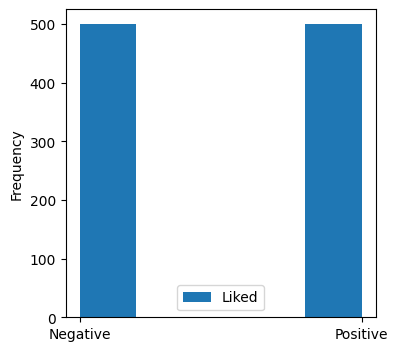

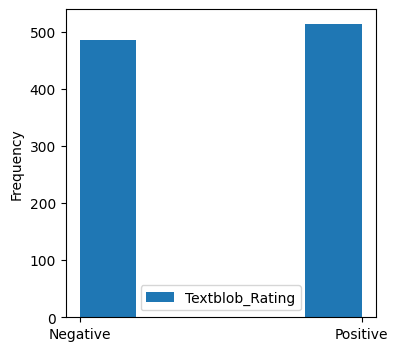

In [140]:
# Plot the two columns liked and Textblob_Rating
restaurant_reviews.plot.hist(column=["Liked"],bins=5, figsize=(4, 4))
plt.xticks([0,1], ["Negative","Positive"], x=2)

bx = restaurant_reviews.plot.hist(column=["Textblob_Rating"],bins=5, figsize=(4, 4))
plt.xticks([0,1], ["Negative","Positive"], x=2)

plt.show()